# **TUGAS UTS PSD**

In [288]:
pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [289]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import library yang dibutuhkan**

---



In [290]:
import pandas as pd
import string
import numpy as np
import re
import nltk
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  

**Baca data**

---

Hilangkan kolom kategori karena yang akan digunakan hanya kolom abstrak saja, kolom kategori akan digunakan sebagai label asli yang berfungsi untuk membandingkan antara label prediksi

In [291]:
df = pd.read_csv("/content/drive/MyDrive/prosaindata/TUGAS/dataset-baru.csv")
data = df.drop('Kategori', axis=1) # kolom label dihapus karena akan digunakan sebagai label asli
label = df['Kategori']
sentence = df['Abstrak']
data

,Unnamed: 0,Abstrak
0,0,Sistem informasi akademik (SIAKAD) merupaka...
1,1,Berjalannya koneksi jaringan komputer dengan l...
2,2,Web server adalah sebuah perangkat lunak serve...
3,3,Penjadwalan kuliah di Perguruan Tinggi me...
4,4,Seiring perkembangan teknologi yang ada diduni...
...,...,...
800,804,Investasi saham selama ini memiliki resiko ker...
801,805,Information Retrieval (IR) merupakan pengambil...
802,806,Klasifikasi citra merupakan proses pengelompok...
803,807,Identifikasi atribut pejalan kaki merupakan sa...


**Proses NLP**


---



*   case_folding = memperkecil setiap huruf
*   cleaning text = menghilangkan simbol dan http
*   tokenisasi = memecah kalimat menjadi kata
*   stopword = menghilangkan kata yang tidak penting
*   stemming = menjadikan kata dasar





In [292]:
def case_folding(comment):
    comment = comment.lower()
    return comment

X = sentence.apply(case_folding)

In [293]:
symbols = "1234567890,!\"#$%&()*+-.…/:;<=>?@[\]^_`{|}~\n"
def cleaning_text(comment):
    comment = re.sub(r"\s—\s", "", comment)
    comment = re.sub(r"http\S+", "", comment)
    for i in symbols:
        comment = np.char.replace(comment, i, ' ')
    return comment
X = X.apply(cleaning_text)

In [294]:
def tokenize(comment):
    return comment.split()
X = X.apply(tokenize)
X

0      [sistem, informasi, akademik, siakad, merupaka...
1      [berjalannya, koneksi, jaringan, komputer, den...
2      [web, server, adalah, sebuah, perangkat, lunak...
3      [penjadwalan, kuliah, di, perguruan, tinggi, m...
4      [seiring, perkembangan, teknologi, yang, ada, ...
                             ...                        
800    [investasi, saham, selama, ini, memiliki, resi...
801    [information, retrieval, ir, merupakan, pengam...
802    [klasifikasi, citra, merupakan, proses, pengel...
803    [identifikasi, atribut, pejalan, kaki, merupak...
804    [topik, deteksi, objek, telah, menarik, perhat...
Name: Abstrak, Length: 805, dtype: object

In [295]:
nltk.download('stopwords')
list_stopwords = stopwords.words('indonesian')
def stopword_removal(comment):
    return [word for word in comment if word not in list_stopwords]
X = X.apply(stopword_removal)
X

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      [sistem, informasi, akademik, siakad, sistem, ...
1      [berjalannya, koneksi, jaringan, komputer, lan...
2      [web, server, perangkat, lunak, server, berfun...
3      [penjadwalan, kuliah, perguruan, kompleks, per...
4      [seiring, perkembangan, teknologi, didunia, mu...
                             ...                        
800    [investasi, saham, memiliki, resiko, kerugian,...
801    [information, retrieval, ir, pengambilan, info...
802    [klasifikasi, citra, proses, pengelompokan, pi...
803    [identifikasi, atribut, pejalan, kaki, salah, ...
804    [topik, deteksi, objek, menarik, perhatian, pe...
Name: Abstrak, Length: 805, dtype: object

In [296]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(comment):
    kata = []
    for term in comment:
        term = stemmer.stem(term)
        kata.append(term)
    return kata
X = X.apply(stemming)
X

0      [sistem, informasi, akademik, siakad, sistem, ...
1      [jalan, koneksi, jaring, komputer, lancar, gan...
2      [web, server, perangkat, lunak, server, fungsi...
3      [jadwal, kuliah, guru, kompleks, masalah, vari...
4      [iring, kembang, teknologi, dunia, muncul, tek...
                             ...                        
800    [investasi, saham, milik, resiko, rugi, gera, ...
801    [information, retrieval, ir, ambil, informasi,...
802    [klasifikasi, citra, proses, kelompok, piksel,...
803    [identifikasi, atribut, pejal, kaki, salah, te...
804    [topik, deteksi, objek, tarik, perhati, kemban...
Name: Abstrak, Length: 805, dtype: object

In [297]:
def gabung(comment):
    sentence = ""
    for i in comment:
      sentence += i+" "
    return sentence
X = X.apply(gabung)
data['Abstrak'] = X
data

,Unnamed: 0,Abstrak
0,0,sistem informasi akademik siakad sistem inform...
1,1,jalan koneksi jaring komputer lancar ganggu ha...
2,2,web server perangkat lunak server fungsi terim...
3,3,jadwal kuliah guru kompleks masalah variabel t...
4,4,iring kembang teknologi dunia muncul teknologi...
...,...,...
800,804,investasi saham milik resiko rugi gera harga s...
801,805,information retrieval ir ambil informasi simpa...
802,806,klasifikasi citra proses kelompok piksel citra...
803,807,identifikasi atribut pejal kaki salah teliti k...


**Proses TF-IDF**

---
*   Menginisialisasi objek TfidfVectorizer yang berfungsi untuk mengubah
*   Melakukan pengaplikasian TfidfVectorizer pada dokumen teks dan disimpan
*   Mengkonversi matriks TF-IDF menjadi dataframe Pandas yang merepresentasikan setiap kata pada dokumen teks yang diberi bobot berdasarkan TF-IDF
*   Tampilkan isi dari hasil konversi










In [298]:
# Inisialisasi objek TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Terapkan TfidfVectorizer pada dokumen
tfidf_matrix = tfidf_vectorizer.fit_transform(X)

# Ubah matriks TF-IDF menjadi dataframe Pandas
df_tfidf = pd.DataFrame(
    tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out()
)

X = df_tfidf.values
print(df_tfidf)

     aalysis  aam  abad  abadi  abai  abdi  ability  abjad  absah  absensi  \
0        0.0  0.0   0.0    0.0   0.0   0.0      0.0    0.0    0.0      0.0   
1        0.0  0.0   0.0    0.0   0.0   0.0      0.0    0.0    0.0      0.0   
2        0.0  0.0   0.0    0.0   0.0   0.0      0.0    0.0    0.0      0.0   
3        0.0  0.0   0.0    0.0   0.0   0.0      0.0    0.0    0.0      0.0   
4        0.0  0.0   0.0    0.0   0.0   0.0      0.0    0.0    0.0      0.0   
..       ...  ...   ...    ...   ...   ...      ...    ...    ...      ...   
800      0.0  0.0   0.0    0.0   0.0   0.0      0.0    0.0    0.0      0.0   
801      0.0  0.0   0.0    0.0   0.0   0.0      0.0    0.0    0.0      0.0   
802      0.0  0.0   0.0    0.0   0.0   0.0      0.0    0.0    0.0      0.0   
803      0.0  0.0   0.0    0.0   0.0   0.0      0.0    0.0    0.0      0.0   
804      0.0  0.0   0.0    0.0   0.0   0.0      0.0    0.0    0.0      0.0   

     ...  zara  zat  zcz   zf  zona  zone  zoning  zoom  zucara

**Proses reduksi dimensi**

---


*   Inisialisasi objek PCA
*   Transformasi fitur-fitur dari data training dan data test
*   lihat presentase dari variansi total yang dijelaskan oleh setiap komponen utama yang digunakan untuk memastikan tidak kehilangan informasi yang signifikan dari data setelah reduksi dimensi.






In [299]:
pca = PCA(n_components =20)

pca_matrik = pca.fit_transform(df_tfidf)

pca.explained_variance_ratio_

array([0.02125167, 0.01698891, 0.01401261, 0.01216534, 0.00958494,
       0.0089402 , 0.00814516, 0.00775419, 0.00756691, 0.00718533,
       0.00670725, 0.0065682 , 0.00637252, 0.00629261, 0.00610832,
       0.0059331 , 0.00567866, 0.00549367, 0.00532733, 0.00519746])

**Proses Clustering menggunakan K-Means**

---



*   tentukan jumlah cluster yang diinginkan dan random_state=0 yang menentukan nilai seed untuk generator angka acak
*   label hasil clustering disimpan ke dalam variabel labels. Selanjutnya, dibuat sebuah dictionary label_dict yang merepresentasikan kelas masing-masing cluster
*   hasil clustering kemudian dicetak ke layar dalam bentuk list mapped_labels





In [300]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(pca_matrik)
labels = kmeans.labels_
class_counts = np.bincount(labels)


print(labels)
# Menampilkan jumlah data pada setiap kelas
for i, count in enumerate(class_counts):
  print("Jumlah data kelas {}: {}".format(i, count))


[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1
 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [301]:
label_dict = {0: 'RPL', 1: 'KOMPUTASI'}
mapped_labels = [label_dict[label] for label in labels]
print(mapped_labels)

['KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMP

**Tampilan Visualisasi Clustering**

---



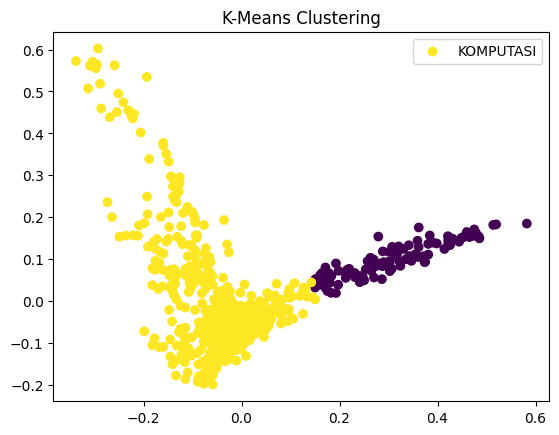

In [302]:
plt.scatter(pca_matrik[:, 0], pca_matrik[:, 1], c=labels)
plt.title('K-Means Clustering')
plt.legend(['KOMPUTASI'], loc='best')
plt.show()

**Perbandingan label asli dengan label prediksi**

---



In [303]:
data = {'Label asli': label, 'label prediksi': mapped_labels}
perbandingan = pd.DataFrame(data)

perbandingan

,Label asli,label prediksi
0,RPL,KOMPUTASI
1,RPL,KOMPUTASI
2,RPL,KOMPUTASI
3,KOMPUTASI,KOMPUTASI
4,RPL,KOMPUTASI
...,...,...
800,KOMPUTASI,KOMPUTASI
801,KOMPUTASI,KOMPUTASI
802,KOMPUTASI,RPL
803,KOMPUTASI,KOMPUTASI


**Hasil yang didapat**

---
Confusion matrix menunjukkan jumlah data yang terklasifikasi dengan benar dan salah untuk setiap kelas. Accuracy menunjukkan proporsi data yang terklasifikasi dengan benar secara keseluruhan. 


In [304]:
confusion = confusion_matrix(label, mapped_labels)
acc = accuracy_score(label, mapped_labels)

print('Confusion matrix:')
print(confusion)
print("Accuracy: {:.2f}%".format(acc * 100))


Confusion matrix:
[[433 101]
 [271   0]]
Accuracy: 53.79%
